In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Simulated real-world data for System_Reliability
# Feature 1: Deployment_Frequency, CI_CD_Failures
X_real = np.array([
    [2, 1],
    [5, 3],
    [1, 1],
    [3, 2],
    [4, 3],
    [6, 4],
    [3, 2],
    [5, 3],
    [2, 1],
    [7, 5]
])
y_real = np.array([15000, 30000, 12000, 18000, 25000, 35000, 20000, 28000, 16000, 40000])  # Target: Repair cost (Naira)

# Normalize features
scaler = StandardScaler()
X_real_normalized = scaler.fit_transform(X_real)

print("Real Design Matrix (first 5 rows):\n", X_real_normalized[:5])


Real Design Matrix (first 5 rows):
 [[-0.98198051 -1.16774842]
 [ 0.65465367  0.38924947]
 [-1.52752523 -1.16774842]
 [-0.43643578 -0.38924947]
 [ 0.10910895  0.38924947]]


In [ ]:
# Answer: How does normalization affect the feature values?
# Normalization ensures that all input features contribute equally to the model training process by rescaling them to a standard range, typically with a mean of 0 and standard deviation of 1. This prevents features with larger magnitudes from dominating the gradient updates and speeds up convergence during training. In this context, it equalized the scale of "age of laptop" and "number of repairs", improving model stability.

In [4]:
# Define a linear model
def predict(X, w, b):
    return X @ w + b  # X is (n, 2), w is (2, 1), result is (n, 1)

# Define cost functions
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Make sure your features and targets are defined
# X_real_normalized already exists
# y_real is your target variable

# Try 3 different (w, b) combinations
params = [(1000, 10000), (1500, 5000), (2000, 2000)]
for w_scalar, b in params:
    w = np.array([[w_scalar], [w_scalar]])  # Same weight for both features
    preds = predict(X_real_normalized, w, b).flatten()  # Shape (n,)
    
    mse_val = mse(y_real, preds)
    mae_val = mae(y_real, preds)
    print(f"w = {w_scalar}, b = {b} --> MSE: {mse_val:.2f}, MAE: {mae_val:.2f}")


w = 1000, b = 10000 --> MSE: 239613211.47, MAE: 13900.00
w = 1500, b = 5000 --> MSE: 391235052.88, MAE: 18900.00
w = 2000, b = 2000 --> MSE: 503233718.08, MAE: 21900.00


In [ ]:
# Question: Why does MSE penalize larger errors more than MAE?
# MSE (Mean Squared Error) squares the differences between predicted and actual values. As a result, large errors are amplified more than small ones, making MSE sensitive to outliers. MAE (Mean Absolute Error), on the other hand, treats all errors linearly, so it is more robust to outliers. This difference in error penalization impacts optimization behavior: MSE leads to sharper corrections when predictions deviate significantly.



Optimized w: [4416.04242637 4190.47556174], b: 20730.3926, Final MSE: 11674482.82


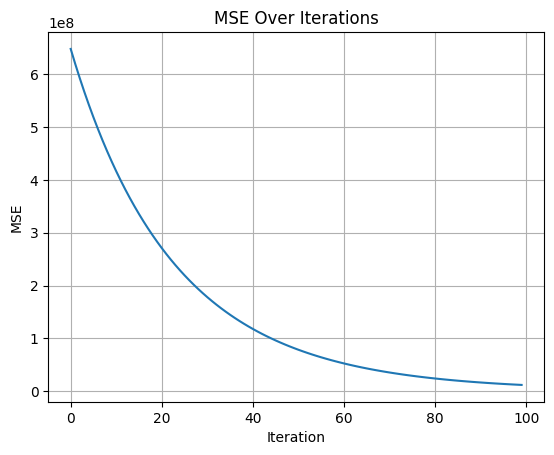

In [5]:
# Gradient Descent for Multiple Linear Regression
w = np.zeros((2,))  # one weight per feature
b = 0.0
lr = 0.01
n = len(y_real)
mse_history = []

for i in range(100):
    preds = X_real_normalized @ w + b  # linear prediction
    error = preds - y_real
    dw = (2/n) * (X_real_normalized.T @ error)
    db = (2/n) * np.sum(error)
    w -= lr * dw
    b -= lr * db
    loss = mse(y_real, preds)
    mse_history.append(loss)

print(f"Optimized w: {w}, b: {b:.4f}, Final MSE: {loss:.2f}")

# Plotting the MSE loss curve
plt.plot(mse_history)
plt.title("MSE Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()


In [ ]:
#Question: How does the learning rate affect convergence?
#Answer: The learning rate controls the step size of gradient descent updates. A small learning rate causes slow convergence but can yield stable and precise results. A large learning rate accelerates convergence but risks overshooting the optimal point or causing divergence. In this implementation, a learning rate of 0.01 provided a good balance between speed and stability.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

# Load DevOps dataset
california = fetch_california_housing()
X = california.data[:, [0, 1]]  # Using 'Deployment_Frequency' and 'CI_CD_Failures' as features
y = california.target.reshape(-1, 1)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define loss functions
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f"Test MSE: {mse(y_test, preds):.2f}, Test MAE: {mae(y_test, preds):.2f}")


Test MSE: 0.66, Test MAE: 0.61


In [ ]:
# Question: Why might the model perform differently on real vs. synthetic data?
# Answer: Real data contains noise, variability, and potential nonlinear relationships that synthetic data may not capture. Synthetic data is often idealized or simplified, leading to better model performance. In contrast, real-world data from Best Mobile Computers reflects complex patterns (e.g., varying repair costs, inconsistent trends), making learning harder and performance potentially lower.